# PHASE THREE PROJECT

## 1. BUSINESS UNDERSTANDING

### 1.1 Business Overview

A Terry Stop, also known as a stop-and-frisk, comes from the U.S. Supreme Court case Terry v. Ohio(1968). This is when a police officer stops and temporarily detains someone based on suspicious behavior, even if they don't have enough evidence to make an arrest. A landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. Terry Stops are stops made of suspicious drivers.

### 1.2 Problem Statement
The project aims to predict whether an arrest will occur following a Terry Stop using available stop-related data. The goal is to identify key factors influencing arrest decisions. Additionally, given the inclusion of sensitive attributes such as race and gender, it is important to investigate whether these factors play a role in arrest decisions, while handling them ethically and responsibly.

### 1.3 Business Objective

To build a classification task model that predicts whether an arrest was made after a Terry stop.

### 1.4 Specific Objectives
1. To determine which factors lead to an arrest after a Terry stop.
2. To identify which model best works for my data.
3. To evaluate my model using metrics such as F1 score, precision, and recall.
4. Uncover patterns and relationships within the data.

### 1.5 Research questions
1. Which factors lead to an arrest after a Terry stop?
2. Which model gives the best results after fitting my data?
3. How do I evaluate my model?
4. Which patterns and relationships are within my data?

## 2. Data Understanding

The dataset to be used in this project is from [Seattle Government](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data). Each row is a unique record of a Terry stop, as reported by the officer conducting the stop.

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('Terry_Stops_20250908.csv')
# Print the first 5 entries
data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000275629,481899,Field Contact,NaN,8544,1993,Female,Hispanic,...,13:47:00.0000000,-,-,-,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,West,Q,Q2
1,36 - 45,53986235598,20240000029589,53986202139,Field Contact,-,8723,1994,Male,White,...,02:50:52.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,DISTURBANCE - OTHER,ONVIEW,WEST PCT 3RD W - KING - PLATOON 1,N,N,West,D,D2
2,26 - 35,-1,20170000036835,234548,Offense Report,NaN,4852,1953,Male,Asian,...,18:36:00.0000000,DISTURBANCE,THEFT - SHOPLIFT,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
3,18 - 25,-1,20180000271087,445585,Offense Report,NaN,8588,1986,Female,White,...,05:43:00.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","WEAPON, PERSON WITH - GUN",911,TRAINING - FIELD TRAINING SQUAD,N,Y,North,J,J1
4,18 - 25,-1,20150000002928,54115,Field Contact,NaN,7745,1988,Female,Declined to Answer,...,00:22:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,-,-,-


In [3]:
# View the last 5 entries
data.tail()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
64694,46 - 55,-1,20150000005033,86815,Field Contact,NaN,5438,1958,Male,White,...,15:50:00.0000000,-,-,-,WEST PCT 2ND W - DAVID BEATS,N,N,-,-,-
64695,36 - 45,7740898821,20210000333780,30594777717,Field Contact,-,8682,1981,Female,White,...,03:20:02.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,PROWLER - TRESPASS,ONVIEW,WEST PCT 3RD W - MARY - PLATOON 1,N,N,-,-,-
64696,18 - 25,-1,20160000180955,157571,Arrest,NaN,7597,1982,Male,White,...,20:14:00.0000000,NUISANCE,WARRANT SERVICES - FELONY,ONVIEW,NORTH PCT 2ND WATCH - NORTH BEATS,N,Y,North,J,J3
64697,36 - 45,37993063212,20230000059256,44771677541,Field Contact,-,8584,1982,Male,White,...,06:25:02.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,ONVIEW,SOUTH PCT 1ST W - SAM - PLATOON 2,N,N,South,O,O3
64698,46 - 55,51069513372,20220000172060,34612012574,Offense Report,-,8737,1995,Male,White,...,03:28:12.0000000,OBS - BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),PROWLER - TRESPASS,911,SOUTH PCT 3RD W - ROBERT - PLATOON 2,N,Y,South,R,R1


In [4]:
# View the number of rows and columns in the dataset
data.shape

(64699, 23)

In [5]:
# Columns in the dataset
data.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [6]:
# Information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64699 entries, 0 to 64698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64699 non-null  object
 1   Subject ID                64699 non-null  int64 
 2   GO / SC Num               64699 non-null  int64 
 3   Terry Stop ID             64699 non-null  int64 
 4   Stop Resolution           64699 non-null  object
 5   Weapon Type               32134 non-null  object
 6   Officer ID                64699 non-null  object
 7   Officer YOB               64699 non-null  int64 
 8   Officer Gender            64699 non-null  object
 9   Officer Race              64699 non-null  object
 10  Subject Perceived Race    64699 non-null  object
 11  Subject Perceived Gender  64699 non-null  object
 12  Reported Date             64699 non-null  object
 13  Reported Time             64699 non-null  object
 14  Initial Call Type     

In [7]:
# Check for null values
data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 566
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

**Observations**<br>
- There are a total of 23 columns and 64699 rows in this dataset
- From this information, we can use `Arrest Flag` as the target variable
- There are several null values from my data
- There's a mixture of both categorical data and numeric data
- Some of the predictor variables include `weapon_type`, `Frisk Flag`, `reported_time` among others.

## 3. Data Preparation

This is where data cleaning, preprocessing, analysis is done.

### 3.1 Data cleaning

This is where the following is done:
- Dealing with missing values
- Checking for duplicates
- Dealing with outliers among others.

In [8]:
# Check for duplicates
data.duplicated().sum()

0

No duplicates.

In [9]:
# Check for missing values
data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 566
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

In [10]:
# Checking for the values in the column
data['Weapon Type'].unique()

array([nan, '-', 'Knife/Cutting/Stabbing Instrument',
       'Lethal Cutting Instrument', 'Club, Blackjack, Brass Knuckles',
       'Firearm Other', 'Blunt Object/Striking Implement', 'Handgun',
       'Mace/Pepper Spray', 'Shotgun', 'Firearm (unk type)',
       'None/Not Applicable', 'Fire/Incendiary Device', 'Firearm',
       'Other Firearm', 'Rifle', 'Club', 'Taser/Stun Gun',
       'Automatic Handgun', 'Personal Weapons (hands, feet, etc.)',
       'Blackjack', 'Poison', 'Brass Knuckles'], dtype=object)

In [11]:
# Check for the values in weapon type
data['Weapon Type'].value_counts()

Weapon Type
-                                       28001
Knife/Cutting/Stabbing Instrument        1491
Lethal Cutting Instrument                1482
Handgun                                   430
Blunt Object/Striking Implement           199
Firearm                                   131
Firearm Other                             100
Other Firearm                              85
Mace/Pepper Spray                          64
Club, Blackjack, Brass Knuckles            49
None/Not Applicable                        21
Taser/Stun Gun                             20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Poison                                      1
Brass Knuckles        

The dash(-) in this case has been used as a placeholder, so we'll have to add it to the None value. Also the null values will be added to the None value. I can't use mode in this case to fill in the missing values as the values in this column are very sensitive so its best if I just add them to the None category.

In [12]:
# Replacing the placeholder with None category as we are not sure what it represents.
data['Weapon Type'] = data['Weapon Type'].replace('-', 'None/Not Applicable')
data['Weapon Type'].value_counts()

Weapon Type
None/Not Applicable                     28022
Knife/Cutting/Stabbing Instrument        1491
Lethal Cutting Instrument                1482
Handgun                                   430
Blunt Object/Striking Implement           199
Firearm                                   131
Firearm Other                             100
Other Firearm                              85
Mace/Pepper Spray                          64
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Poison                                      1
Brass Knuckles                              1
Name: count, dtype: in

In [13]:
# Filling the missing values with None category
data['Weapon Type'].fillna(value = 'None/Not Applicable', inplace = True)
data['Weapon Type'].value_counts() # Check for the total number of a category mentioned

Weapon Type
None/Not Applicable                     60587
Knife/Cutting/Stabbing Instrument        1491
Lethal Cutting Instrument                1482
Handgun                                   430
Blunt Object/Striking Implement           199
Firearm                                   131
Firearm Other                             100
Other Firearm                              85
Mace/Pepper Spray                          64
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Poison                                      1
Brass Knuckles                              1
Name: count, dtype: in

In [14]:
# Check for the missing values again
data.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               566
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [15]:
# I can drop the remaining null values as they are little and may not impact the dataset
data.dropna(inplace = True)
data.isna().sum() # Checking if the changes have been made

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [16]:
# Matches the indexing with the current number of rows after dropping the null rows
data = data.reset_index(drop = True)

In [17]:
# Checking if the indexing has worked by looking at the total entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64133 entries, 0 to 64132
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64133 non-null  object
 1   Subject ID                64133 non-null  int64 
 2   GO / SC Num               64133 non-null  int64 
 3   Terry Stop ID             64133 non-null  int64 
 4   Stop Resolution           64133 non-null  object
 5   Weapon Type               64133 non-null  object
 6   Officer ID                64133 non-null  object
 7   Officer YOB               64133 non-null  int64 
 8   Officer Gender            64133 non-null  object
 9   Officer Race              64133 non-null  object
 10  Subject Perceived Race    64133 non-null  object
 11  Subject Perceived Gender  64133 non-null  object
 12  Reported Date             64133 non-null  object
 13  Reported Time             64133 non-null  object
 14  Initial Call Type     

In [18]:
# Standardizing formats
data['Reported Date'] = pd.to_datetime(data['Reported Date'])
data['Reported Date']

0       2018-07-30
1       2024-02-01
2       2017-01-30
3       2018-07-23
4       2015-06-17
           ...    
64128   2015-09-29
64129   2021-12-19
64130   2016-05-23
64131   2023-03-03
64132   2022-07-05
Name: Reported Date, Length: 64133, dtype: datetime64[ns]

In [19]:
data['Reported Time'] = pd.to_datetime(data['Reported Time'])

C:\Users\USER\AppData\Local\Temp\ipykernel_11364\2998005861.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Reported Time'] = pd.to_datetime(data['Reported Time'])


In [20]:
data['Reported Time'] = data['Reported Time'].dt.time
data['Reported Time']

0        13:47:00
1        02:50:52
2        18:36:00
3        05:43:00
4        00:22:00
           ...   
64128    15:50:00
64129    03:20:02
64130    20:14:00
64131    06:25:02
64132    03:28:12
Name: Reported Time, Length: 64133, dtype: object

In [21]:
data['Call Type'].unique() # View unique values/ categories in the column Call Type

array(['-', 'ONVIEW', '911', 'TELEPHONE OTHER, NOT 911',
       'ALARM CALL (NOT POLICE ALARM)', 'SCHEDULED EVENT (RECURRING)',
       'TEXT MESSAGE', 'HISTORY CALL (RETRO)'], dtype=object)

In [22]:
# Change the dash placeholder with another telephone
data['Call Type'] = data['Call Type'].replace('-', 'TELEPHONE OTHER, NOT 911')
data['Call Type'].value_counts()

Call Type
911                              30333
TELEPHONE OTHER, NOT 911         17661
ONVIEW                           15570
ALARM CALL (NOT POLICE ALARM)      537
TEXT MESSAGE                        30
SCHEDULED EVENT (RECURRING)          1
HISTORY CALL (RETRO)                 1
Name: count, dtype: int64

In [23]:
# Get stop year so that I can compute the officer's age
data["stop_year"] = data["Reported Date"].dt.year

# Compute officer age at time of stop
data["Officer Age"] = data["stop_year"] - data["Officer YOB"]

In [24]:
# Convert Arrest Flag: Y -> 1, N -> 0
data['Arrest Flag'] = data['Arrest Flag'].map({'Y': 1, 'N': 0})

In [25]:
print(data['Arrest Flag'].unique())

[0 1]


In [26]:
# Chossing the relevant columns to use in achieving my objective
relevant_columns = [
    'Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Age', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender',
    'Call Type', 'Arrest Flag', 'Frisk Flag', 'Precinct'
]

In [27]:
# Check for placeholders in the values of each column
for col in relevant_columns:
    print(f'{col}: {data[col].unique()}')

Subject Age Group: ['46 - 55' '36 - 45' '26 - 35' '18 - 25' '56 and Above' '-' '1 - 17']
Stop Resolution: ['Field Contact' 'Offense Report' 'Arrest' 'Citation / Infraction'
 'Referred for Prosecution']
Weapon Type: ['None/Not Applicable' 'Knife/Cutting/Stabbing Instrument'
 'Lethal Cutting Instrument' 'Club, Blackjack, Brass Knuckles'
 'Firearm Other' 'Blunt Object/Striking Implement' 'Handgun'
 'Mace/Pepper Spray' 'Shotgun' 'Firearm (unk type)'
 'Fire/Incendiary Device' 'Firearm' 'Other Firearm' 'Rifle' 'Club'
 'Taser/Stun Gun' 'Automatic Handgun'
 'Personal Weapons (hands, feet, etc.)' 'Blackjack' 'Poison'
 'Brass Knuckles']
Officer Age: [ 25  30  64  32  27  39  34  31  44  38  36  35  26  40  57  24  43  28
  46  48  55  45  67  33  47  29  37  42  23  50  52  49  41  58  54  53
  56  59  51  22 125  68  61  63  60  21  62  72  71  66  65  70  69]
Officer Gender: ['Female' 'Male']
Officer Race: ['Hispanic' 'White' 'Asian' 'Declined to Answer'
 'Black or African American' 'Two or Mo

In [28]:
# Change the dash placeholder with unknown category
data['Precinct'] = data['Precinct'].replace('-', 'Unknown')
data['Precinct'].value_counts()

Precinct
West         18256
North        13434
Unknown      10879
East          8660
South         7800
Southwest     4962
OOJ            120
FK ERROR        22
Name: count, dtype: int64

In [29]:
# Check for the values in the subject age category
data['Subject Age Group'].value_counts()

Subject Age Group
26 - 35         21394
36 - 45         14578
18 - 25         11945
46 - 55          8117
56 and Above     3392
1 - 17           2364
-                2343
Name: count, dtype: int64

In [30]:
# Since the dash placeholder contains 3% of the data in that column and I have no option of an unknown category,
# I've opted to drop the rows with the dash placeholder in that specific column
data = data[data['Subject Age Group'] != '-']
data = data.reset_index(drop = True) # Make the indexing correct after manipulating the data

In [31]:
# Check for the values in the Frisk Flag category
data['Frisk Flag'].value_counts()

Frisk Flag
N    46380
Y    15021
-      389
Name: count, dtype: int64

In [32]:
# Since the dash placeholder contains 0.6% of the data in that column and I have no option of an unknown category,
# I've opted to drop the rows with the dash placeholder in that specific column
data = data[data['Frisk Flag'] != '-']
data = data.reset_index(drop = True)

In [33]:
# Compiling the relevant columns
df = data.loc[:,relevant_columns]
df.head() # View top 5 entries

,Subject Age Group,Stop Resolution,Weapon Type,Officer Age,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Arrest Flag,Frisk Flag,Precinct
0,46 - 55,Field Contact,None/Not Applicable,25,Female,Hispanic,White,Male,"TELEPHONE OTHER, NOT 911",0,N,West
1,36 - 45,Field Contact,None/Not Applicable,30,Male,White,Black or African American,Male,ONVIEW,0,N,West
2,26 - 35,Offense Report,None/Not Applicable,64,Male,Asian,White,Male,911,0,N,North
3,18 - 25,Offense Report,None/Not Applicable,32,Female,White,Black or African American,Male,911,0,Y,North
4,18 - 25,Field Contact,None/Not Applicable,27,Female,Declined to Answer,Black or African American,Female,"TELEPHONE OTHER, NOT 911",0,N,Unknown


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61401 entries, 0 to 61400
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61401 non-null  object
 1   Stop Resolution           61401 non-null  object
 2   Weapon Type               61401 non-null  object
 3   Officer Age               61401 non-null  int64 
 4   Officer Gender            61401 non-null  object
 5   Officer Race              61401 non-null  object
 6   Subject Perceived Race    61401 non-null  object
 7   Subject Perceived Gender  61401 non-null  object
 8   Call Type                 61401 non-null  object
 9   Arrest Flag               61401 non-null  int64 
 10  Frisk Flag                61401 non-null  object
 11  Precinct                  61401 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.6+ MB


## 4. Data Preparation

### 4.1 Exploratory Data Analysis(EDA)

#### Univariate Analysis

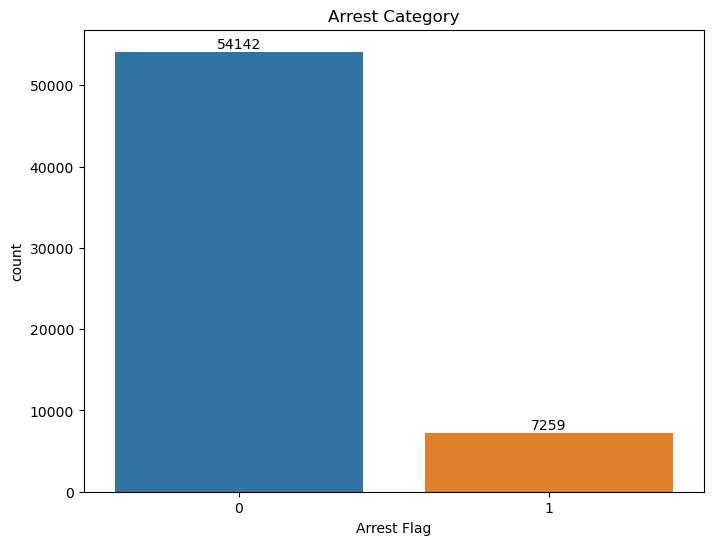

In [35]:
figure, ax = plt.subplots(figsize = (8,6))
sns.countplot(data = df, x = 'Arrest Flag') # Plot a countplot
ax.bar_label(ax.containers[0], label_type = 'edge') # Labelling of the graphs
ax.set_title('Arrest Category'); # Set title

**Observation**<br>
The number of no arrests(0) is more by 54142, and the number of arrests(1) is less by 7259

Cleary from this graph, there is some class imbalance. We'll solve this issue in data preprocessing after the analysis.

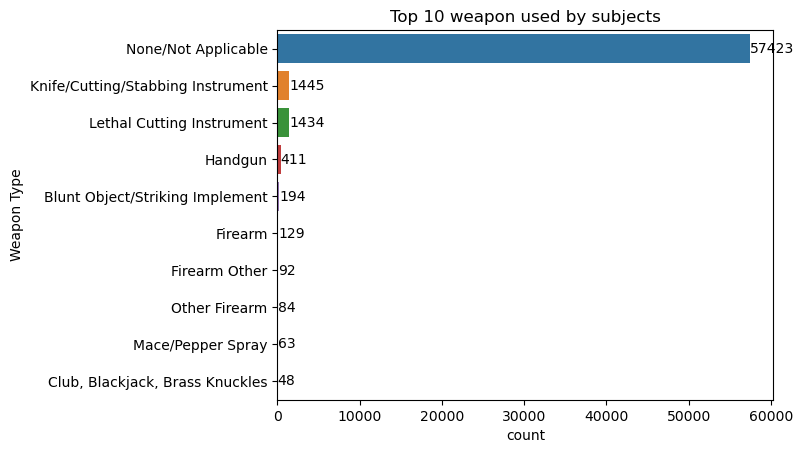

In [36]:
# Plot the graph
top_weapons = df['Weapon Type'].value_counts().head(10).index # To get the top 10 weapons

ax = sns.countplot(data=df[df['Weapon Type'].isin(top_weapons)], y='Weapon Type', order=top_weapons) # Plotting a countplot
ax.set_title('Top 10 weapon used by subjects'); #Title of the plot
ax.bar_label(ax.containers[0], label_type = 'edge');

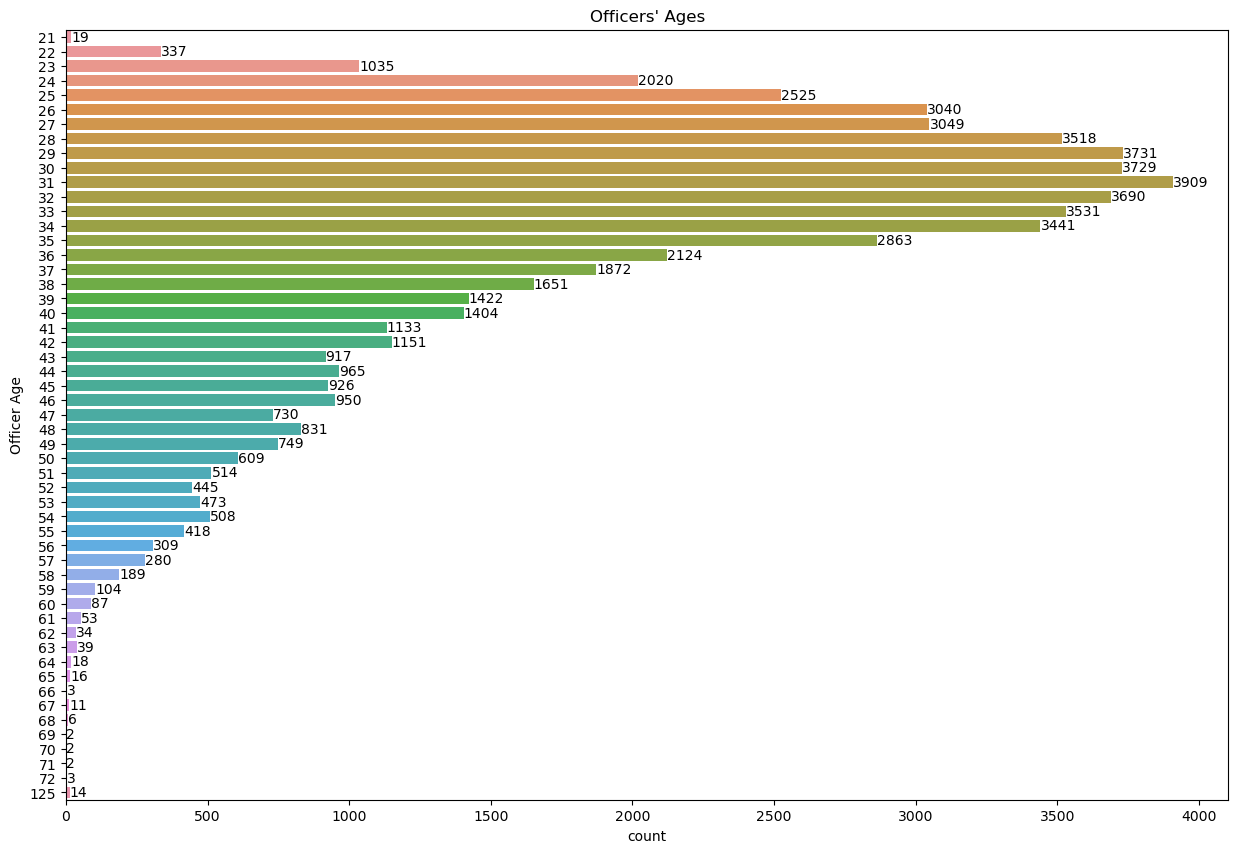

In [37]:
figure, ax = plt.subplots(figsize = (15, 10))
sns.countplot(data = df, y = 'Officer Age') # Plot a countplot
ax.bar_label(ax.containers[0], label_type = 'edge') # Labelling of the graphs
ax.set_title("Officers' Ages"); # Set title

#### Bivariate Analysis

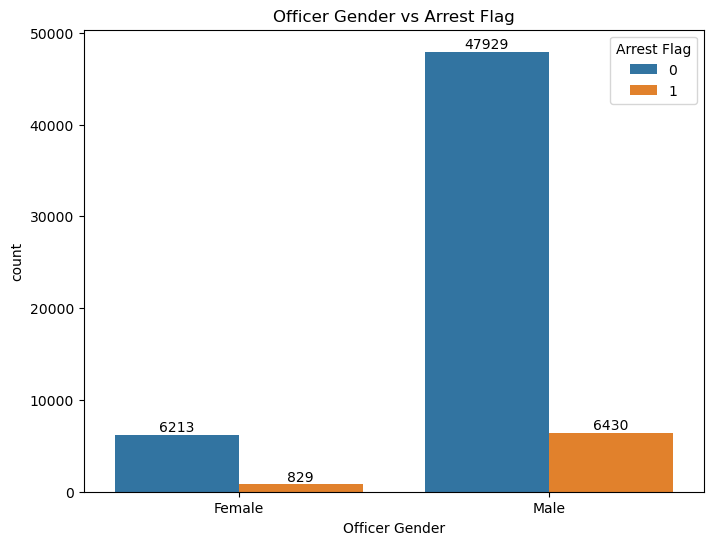

In [38]:
figure, ax = plt.subplots(figsize = (8, 6))
# Plot a countplot
sns.countplot(data = df, x = 'Officer Gender', hue = df['Arrest Flag'].astype(str))
# Set a title for the graph
ax.set_title('Officer Gender vs Arrest Flag')
# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge');

**Observations**<br>
Most arrests are made by the male gender by 6430.

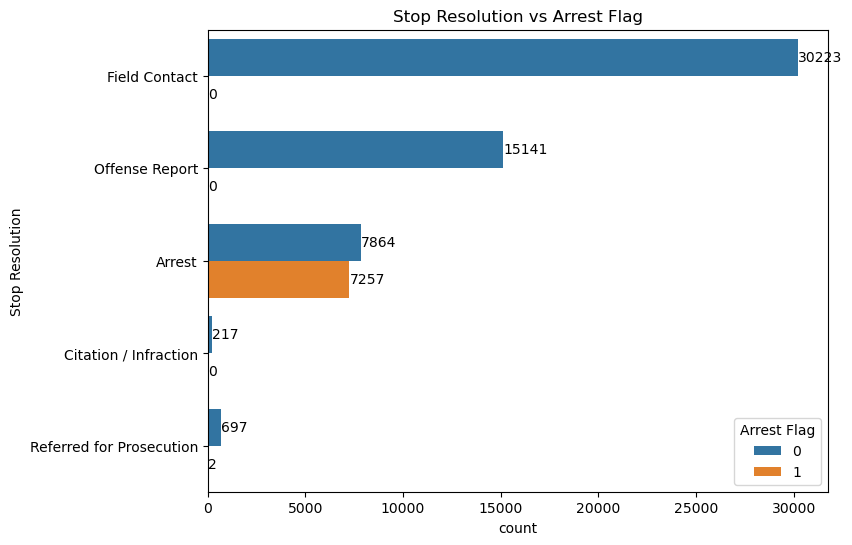

In [39]:
figure, ax = plt.subplots(figsize = (8, 6))
# Plot the countplot
sns.countplot(data = df, y = 'Stop Resolution', hue = df['Arrest Flag'].astype(str)) # The Arrest flag is made a string temporarily so that I can plot
ax.set_title('Stop Resolution vs Arrest Flag') # Set title
# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge');

The arrest category in the stop resolution class can cause data leakage when modelling.

### 4.2 Data Preprocessing

In [40]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [41]:
# Define the variables
X = df.drop('Arrest Flag', axis = 1) # Independent/features
y = df['Arrest Flag'] # Dependent/target

In [42]:
# Split the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
# Change the categories using one-hot encoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')

X_train_categorical = X_train.select_dtypes('object').copy() # Defining the categorical variables in train set
X_train_categorical
X_test_categorical = X_test.select_dtypes('object').copy() # Defining the categorical variables in the test set
X_test_categorical

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Frisk Flag,Precinct
28641,26 - 35,Field Contact,None/Not Applicable,Male,Hispanic,Black or African American,Male,"TELEPHONE OTHER, NOT 911",N,Unknown
34913,36 - 45,Arrest,Knife/Cutting/Stabbing Instrument,Male,Hispanic,White,Male,911,Y,North
9785,46 - 55,Field Contact,None/Not Applicable,Male,White,Black or African American,Male,911,Y,North
53339,36 - 45,Arrest,None/Not Applicable,Male,White,Black or African American,Male,"TELEPHONE OTHER, NOT 911",Y,East
57504,18 - 25,Offense Report,None/Not Applicable,Male,White,White,Male,911,N,North
...,...,...,...,...,...,...,...,...,...,...
47784,36 - 45,Offense Report,None/Not Applicable,Male,White,American Indian or Alaska Native,Male,911,Y,West
54214,18 - 25,Arrest,None/Not Applicable,Male,White,Black or African American,Male,911,N,West
50781,46 - 55,Field Contact,None/Not Applicable,Male,White,White,Male,911,N,East
39331,36 - 45,Field Contact,None/Not Applicable,Male,White,Unknown,Male,ONVIEW,N,West


In [44]:
ohe.fit(X_train_categorical) # Fit the data to the onehotencoder
X_train_ohe = pd.DataFrame( # Change it to a dataframe
    ohe.transform(X_train_categorical),
    index = X_train_categorical.index,
    columns=ohe.get_feature_names_out(X_train_categorical.columns) # Get column names
)
X_train_ohe

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Blackjack,...,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Frisk Flag_Y,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West
29827,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59938,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29555,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Transform the test data using the encoder
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),  
    index=X_test_categorical.index,
    columns=ohe.get_feature_names_out(X_test_categorical.columns) 
)
X_test_ohe

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Blackjack,...,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Frisk Flag_Y,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West
28641,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9785,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53339,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57504,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50781,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39331,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
# Scale the officer's age using minmaxscaler
scaler = MinMaxScaler()
numeric_features = ['Officer Age']
X_train_numeric = X_train[numeric_features].copy() # Defining the numeric values in the training set
X_train_numeric
X_test_numeric = X_test[numeric_features].copy() # Defining the numeric values in the testing set
X_test_numeric

,Officer Age
28641,29
34913,32
9785,37
53339,39
57504,31
...,...
47784,48
54214,32
50781,32
39331,23


In [47]:
# Fit the scaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric),
                       index = X_train_numeric.index,
                       columns = X_train_numeric.columns)
X_train_scaled

,Officer Age
29827,0.067308
59938,0.028846
29555,0.048077
51597,0.105769
30547,0.182692
...,...
54343,0.096154
38158,0.173077
860,0.163462
15795,0.105769


In [48]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric),
                       index = X_test_numeric.index,
                       columns = X_test_numeric.columns)
X_test_scaled

,Officer Age
28641,0.076923
34913,0.105769
9785,0.153846
53339,0.173077
57504,0.096154
...,...
47784,0.259615
54214,0.105769
50781,0.105769
39331,0.019231


In [49]:
# Add back all the transformed numerical X features
X_train_full = pd.concat([X_train_ohe.reset_index(drop = True), X_train_scaled.reset_index(drop = True)], axis = 1)
X_train_full

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Blackjack,...,Call Type_TEXT MESSAGE,Frisk Flag_Y,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.067308
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.028846
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.048077
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.105769
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.182692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.096154
49116,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.173077
49117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.163462
49118,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105769


In [50]:
# Add back all the transformed numerical X features
X_test_full = pd.concat([X_test_ohe.reset_index(drop = True), X_test_scaled.reset_index(drop = True)], axis = 1)
X_test_full

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Blackjack,...,Call Type_TEXT MESSAGE,Frisk Flag_Y,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.076923
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.105769
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.153846
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173077
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259615
12277,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105769
12278,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105769
12279,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.019231


## 4 & 5. Modelling &  Evaluation

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) # Using SMOTE to solve class imbalance
X1_train, y1_train = smote.fit_resample(X_train_full, y_train)

In [52]:
y1_train.value_counts() # To check if the classes have balanced data

Arrest Flag
0    43367
1    43367
Name: count, dtype: int64

In [53]:
# Fit the training data to the model
# Saga works well for large datasets, the minor class is used 3x
logreg = LogisticRegression(fit_intercept = False, solver = 'saga', C = 1.0, class_weight = {0:1, 1:3})
model = logreg.fit(X1_train, y1_train)
model

LogisticRegression(class_weight={0: 1, 1: 3}, fit_intercept=False,
                   solver='saga')

In [54]:
# Evaluating the model using precision, accuracy, recall and f1 score metrics
y_pred = model.predict(X_test_full)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     10775
           1       0.54      1.00      0.70      1506

    accuracy                           0.89     12281
   macro avg       0.77      0.94      0.82     12281
weighted avg       0.94      0.89      0.91     12281



In [55]:
y_score = logreg.fit(X_train_full, y_train).decision_function(X_test_full)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [56]:
print('AUC: {}'.format(auc(fpr, tpr))) # AUC score of the model

AUC: 0.9652526783816012


AUC: 0.9652526783816012


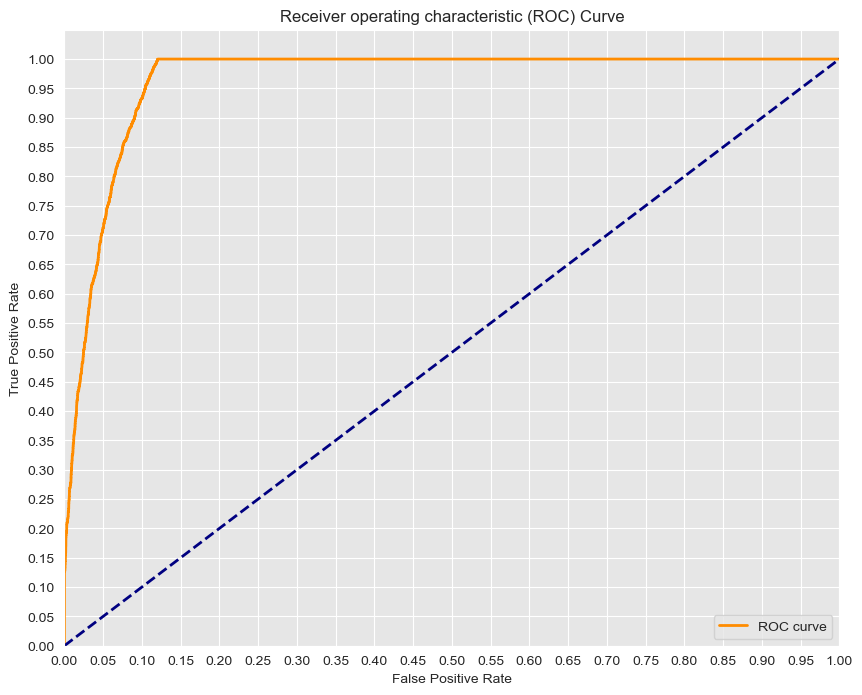

In [57]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Import the Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:1, 1:3})# the minor class is used 3x

tree.fit(X1_train, y1_train)# Fit the training data to the model

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy')

In [59]:
y_pred = tree.predict(X_test_full) # Form predictions using the test set

In [60]:
print(accuracy_score(y_test, y_pred)) # Accuracy of the model

0.9136063838449637


In [61]:
print(classification_report(y_test, y_pred)) # A classificatio report that has all the results for the precision, recall, accuracy, f1-score

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10775
           1       0.63      0.70      0.66      1506

    accuracy                           0.91     12281
   macro avg       0.80      0.82      0.81     12281
weighted avg       0.92      0.91      0.92     12281



In [62]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state = 42, class_weight = 'balanced', n_estimators = 200)
rand.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [63]:
y_pred = rand.predict(X_test_full) # Form the predictions using test set

In [64]:
print(classification_report(y_test, y_pred)) # See the classification report which shows the results of the model

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10775
           1       0.65      0.73      0.69      1506

    accuracy                           0.92     12281
   macro avg       0.81      0.84      0.82     12281
weighted avg       0.92      0.92      0.92     12281



**Observations**<br>
Clearly, from evaluation of the three models, the least model likely to be used is logistic regression model as it hs low results when compared to the rest. We can use either decision tree or random forest classifier as the both produce better results and almost similar.